<a href="https://colab.research.google.com/github/vgutierrezmendivil/UnsupervisedML/blob/main/ClusteringSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Definimos path a archivos
songs_features = 'songs_features.csv'
songs_metadata = 'songs_metadata.csv'

#Leemos archivos
df_features = pd.read_csv(songs_features)
df_metadata = pd.read_csv(songs_metadata)

#Combinamos ambos archivos por id
df_songs = pd.merge(df_features, df_metadata, left_on = "id", right_on = "song_id")

columns_to_drop = ['Unnamed: 0_x', 'Unnamed: 0_y', 'song_id']
df_songs.drop(columns=columns_to_drop, inplace=True)

#Comenzamos análisis exploratorio

#Mostramos métricas descriptivas básicas
print("Métricas descriptivas:")
print(df_songs.describe())

#Cantidad de nulos
print("Cantidad de nulos:")
print(df_songs.isna().sum())

# Genero Boxplot de Características Musicales
sns.set(style="whitegrid")
#fig, axes = plt.subplots(2, 7, figsize=(20, 5))

columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'popularity']

for col in columns:
  data = df_songs[col]
  sns.boxplot(data)
  plt.title('Boxplot de la columna:' + col)
  plt.ylabel('Valor')

plt.show()

# Histograma de Popularidad de las canciones
plt.figure(figsize=(10, 6))
sns.histplot(df_songs['popularity'], bins=30, kde=True)
plt.title('Distribución de la Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

# Número de canciones por artista y por álbum
songs_per_artist = df_songs['artist'].value_counts()
songs_per_album = df_songs['album'].value_counts()

# Top 10 Artistas y Álbumes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

top_artists = songs_per_artist.head(10)
top_albums = songs_per_album.head(10)

sns.barplot(ax=axes[0], x=top_artists.values, y=top_artists.index)
axes[0].set_title('Top 10 Artistas con Más Canciones')
axes[0].set_xlabel('Número de Canciones')
axes[0].set_ylabel('Artista')

sns.barplot(ax=axes[1], x=top_albums.values, y=top_albums.index)
axes[1].set_title('Top 10 Álbumes con Más Canciones')
axes[1].set_xlabel('Número de Canciones')
axes[1].set_ylabel('Álbum')

plt.tight_layout()
plt.show()

# Distribución de Fechas de Lanzamiento
df_songs['realese_date'] = pd.to_datetime(df_songs['realese_date'])
release_date_distribution = df_songs['realese_date'].dt.year.value_counts().sort_index()

plt.figure(figsize=(12, 6))
release_date_distribution.plot(kind='line')
plt.title('Distribución de Fechas de Lanzamiento de Canciones a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Canciones')
plt.show()



FileNotFoundError: ignored

In [ ]:
#identifico las variables cualitativas y también esas que no nos sirven para nuestro análisis, armo un df solo con las variables cuantitativas

var_cualitativas=['song_name', 'artist', 'album', 'key', 'mode', 'time_signature']
var_inutiles=['type', 'uri', 'track_href', 'analysis_url']

df_cuanti=df_songs.copy()
df_cuanti.head()
df_cuanti.drop(columns=var_cualitativas, inplace=True)
df_cuanti.drop(columns=var_inutiles, inplace=True)


In [ ]:
columnas = list(df_cuanti.columns)

# Mover la columna 'id' al primer lugar
columnas.remove('id')
columnas = ['id'] + columnas

# Reordenar las columnas en el DataFrame
df_cuanti = df_cuanti[columnas]

df_cuanti.head()

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,realese_date,popularity
0,31EqF298ZkU9U7DdOds0Zx,0.851,0.843,-3.634,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,2007-11-10,42
1,7d4pdMym8ZBOgf1oVPTiPb,0.543,0.962,-5.337,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,1993-06-18,69
2,3MPKkfraGF4YO4kis5PILy,0.595,0.749,-6.627,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,2007-11-10,47
3,64H5Dy5OI1R6cpoRn4ZM5t,0.682,0.629,-10.538,0.1280,0.4970,0.000028,0.4260,0.696,78.749,155933,2015-08-14,44
4,42e4yW4Xu2e8LdHQK6CnwG,0.543,0.557,-8.672,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,2006-01-01,23


In [ ]:
#de la variable release_date me quedo solo con el año

# Convertir la columna 'release_date' a tipo datetime
df_cuanti['realese_date'] = pd.to_datetime(df_cuanti['realese_date'])

# Extraer el año y asignarlo a una nueva columna 'release_year'
df_cuanti['release_year'] = df_cuanti['realese_date'].dt.year

# Eliminar la columna original 'release_date' si no la necesitas
df_cuanti = df_cuanti.drop('realese_date', axis=1)


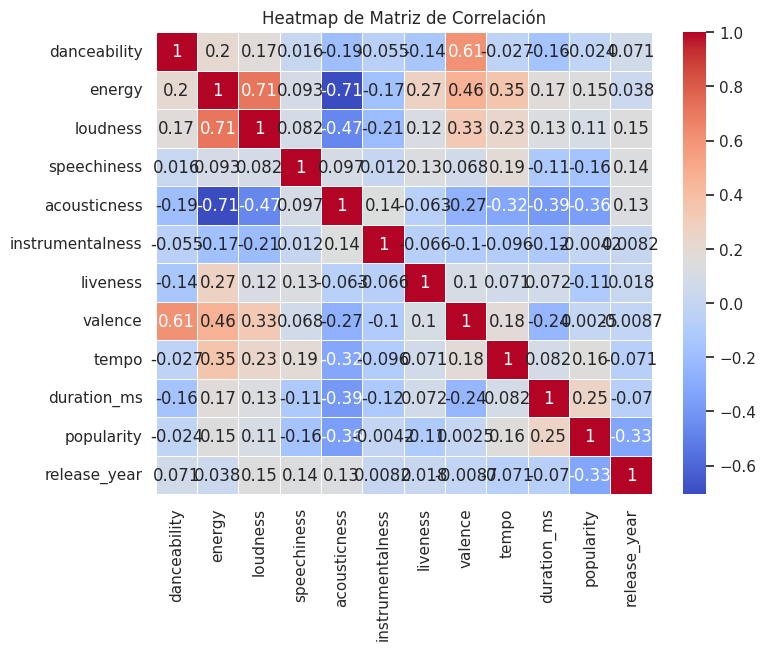

In [ ]:
df_cuanti_numeric = df_cuanti.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
matriz_correlacion = df_cuanti_numeric.corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", linewidths=.5)
plt.title("Heatmap de Matriz de Correlación")
plt.show()

In [ ]:
%%R
install.packages("devtools")
devtools::install_github("kassambara/factoextra")


In [ ]:
%%R
# Definimos el path a los archivos
songs_features <- 'songs_features.csv'
songs_metadata <- 'songs_metadata.csv'

# Leemos archivos
df_features <- read.csv(songs_features)
df_metadata <- read.csv(songs_metadata)

# Combinamos ambos archivos por id
df_songs <- merge(df_features, df_metadata, by.x = "id", by.y = "song_id")

# Columnas a eliminar
columns_to_drop <- c('Unnamed: 0.x', 'Unnamed: 0.y', 'song_id')
df_songs <- df_songs[, !(names(df_songs) %in% columns_to_drop)]

# Variables cualitativas
var_cualitativas <- c('song_name', 'artist', 'album', 'key', 'mode', 'time_signature')

# Variables inútiles
var_inutiles <- c('type', 'uri', 'track_href', 'analysis_url')

# Crear un nuevo DataFrame para variables cuantitativas
df_cuanti <- df_songs

# Eliminar columnas cualitativas e inútiles
df_cuanti <- df_cuanti[, !(names(df_cuanti) %in% var_cualitativas)]
df_cuanti <- df_cuanti[, !(names(df_cuanti) %in% var_inutiles)]

# Mover la columna 'id' al primer lugar
df_cuanti <- df_cuanti[c('id', setdiff(names(df_cuanti), 'id'))]

# Convertir la columna 'release_date' a tipo Date
df_cuanti$realese_date <- as.Date(df_cuanti$realese_date)

# Extraer el año y asignarlo a una nueva columna 'release_year'
df_cuanti$release_year <- format(df_cuanti$release_date, "%Y")

# Eliminar la columna original 'release_date' si no la necesitas
df_cuanti <- df_cuanti[, !(names(df_cuanti) %in% 'release_date')]




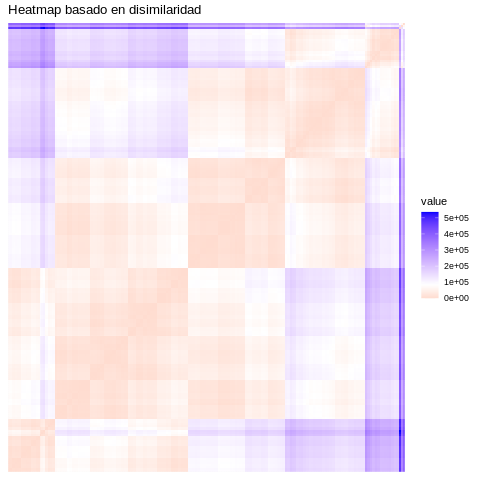

In [ ]:
%%R
library(factoextra)
fviz_dist(dist(df_cuanti), show_labels = FALSE) + labs(title = "Heatmap basado en disimilaridad")



In [ ]:
%%R
#escalo el df
numeric_columns = sapply(df_cuanti, is.numeric)

df_cuanti[numeric_columns] = scale(df_cuanti[numeric_columns])


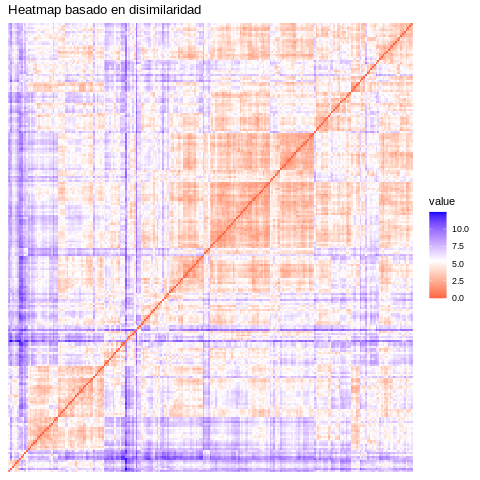

In [ ]:
%%R
library(factoextra)
fviz_dist(dist(df_cuanti), show_labels = FALSE) + labs(title = "Heatmap basado en disimilaridad")

Dendograma habiendo realizado clustering jerárquico con el método single linkage:

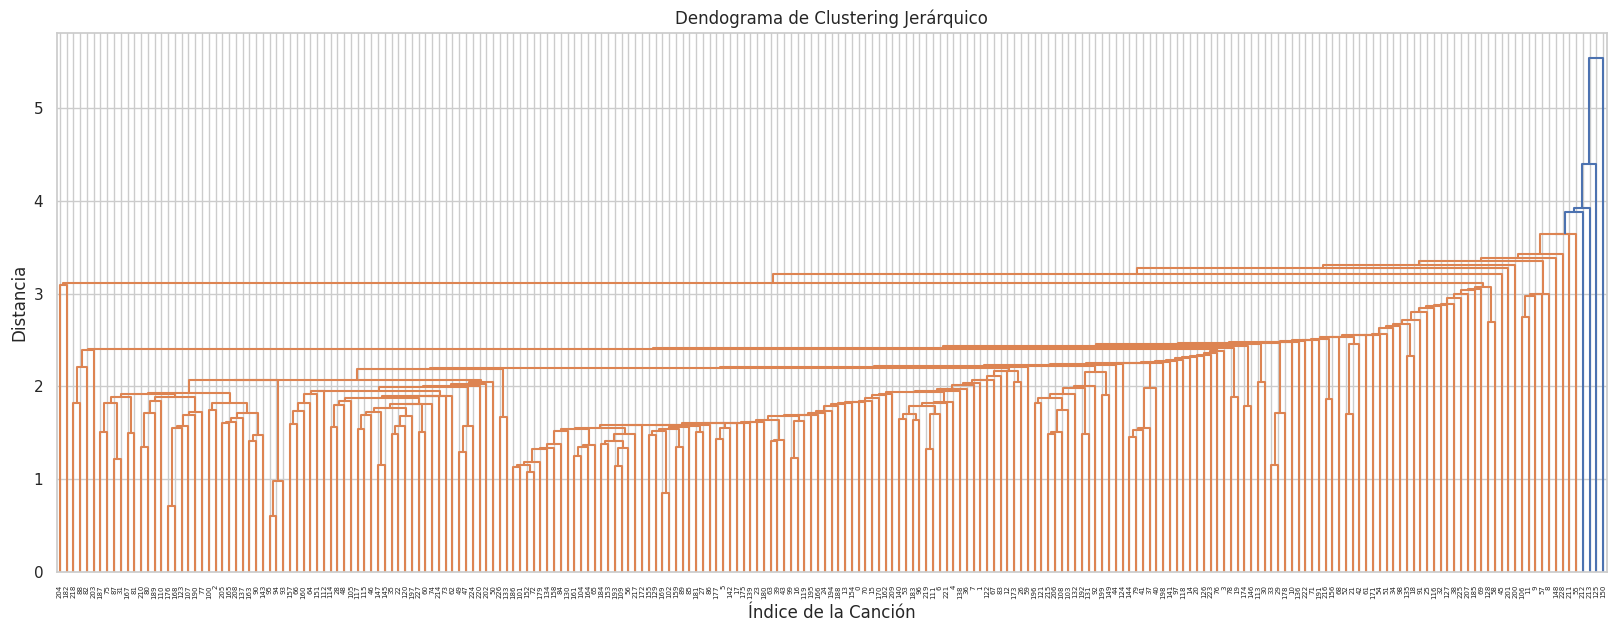

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionamos variables relevantes para el clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms']
features_df = df_songs[features]

# Antes de aplicar clustering jerárquico es necesario estandarizar.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Aplicamos clustering jerárquico
linked = linkage(scaled_features, method='single')

# Crear el dendograma
plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Clustering Jerárquico')
plt.xlabel('Índice de la Canción')
plt.ylabel('Distancia')
plt.show()

Si bien no hay clusters claros, analizamos el dendograma para entender cuales son las observaciones que separa primero del conjunto de datos, ya que se podría tratar de outliers

In [ ]:
from scipy.cluster.hierarchy import fcluster

# Definir el número de clusters (k=4 en tu caso)
k = 5

# Obtener los clusters
clusters = fcluster(linked, k, criterion='maxclust')

# Fusionar DataFrames utilizando la columna 'song_id' como clave
df_sl = df_metadata[['song_id', 'song_name']].copy()

# Seleccionar las columnas necesarias
df_sl['clusters_sl'] = clusters

df_sl[df_sl['clusters_sl']>1]

,song_id,song_name,clusters_sl
125,4ys11R56hYtBpYAvYrwh7p,Huellas,4
150,2QsOO5YLSwejpB3GB56uZ1,The Clansman - Live At Rock in Rio '01,5
212,08QaHlMPWuO5PUxjl61bXn,He's a Pirate,2
213,5K2OuUEVN3eh581IpggOH1,"Por Una Cabeza (From ""Scent Of A Woman"")",3


*Dendograma* habiendo realizado clustering jerárquico con el método ward:

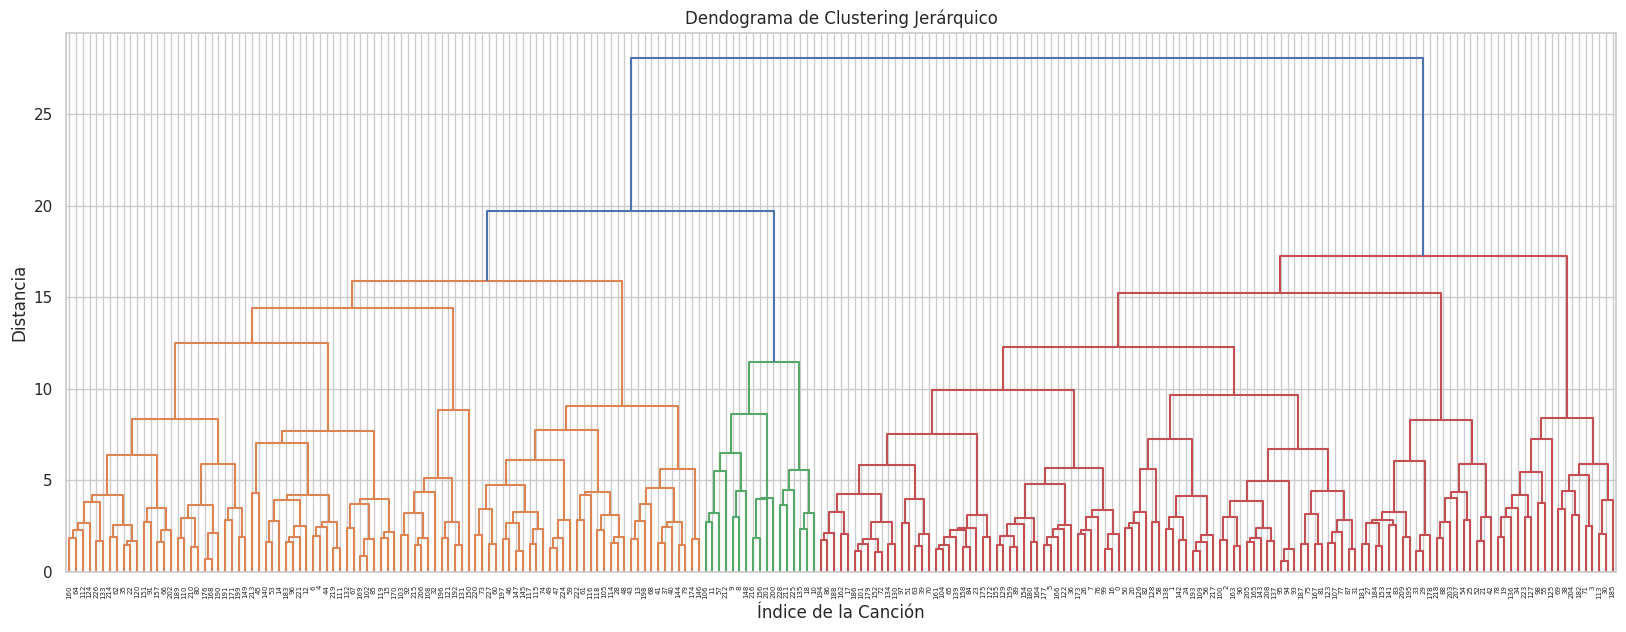

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionamos variables relevantes para el clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms']
features_df = df_songs[features]

# Antes de aplicar clustering jerárquico es necesario estandarizar.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Aplicamos clustering jerárquico
linked = linkage(scaled_features, method='ward')

# Crear el dendograma
plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Clustering Jerárquico')
plt.xlabel('Índice de la Canción')
plt.ylabel('Distancia')
plt.show()

Dendograma habiendo realizado clustering jerárquico con el método complete linkage:

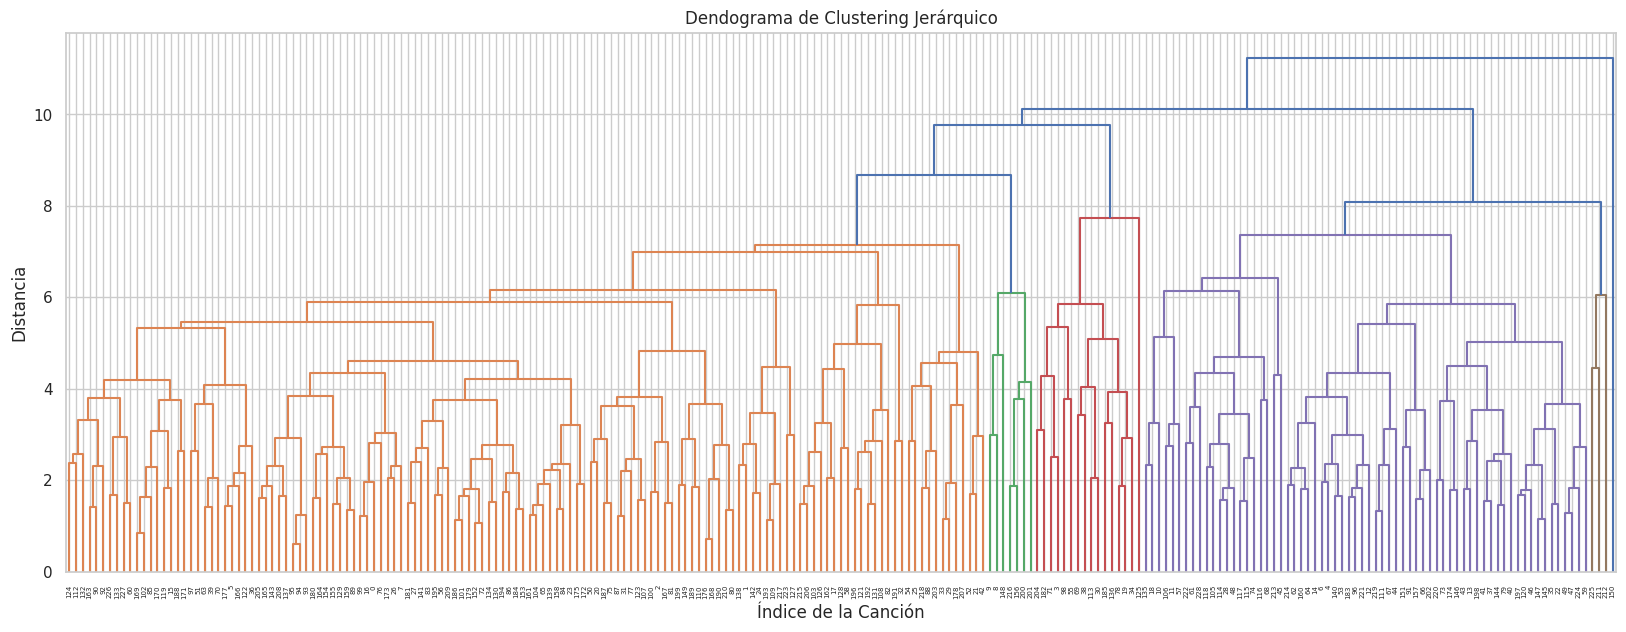

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionamos variables relevantes para el clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms']
features_df = df_songs[features]

# Antes de aplicar clustering jerárquico es necesario estandarizar.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_df)

# Aplicamos clustering jerárquico
linked = linkage(scaled_features, method='complete')

# Crear el dendograma
plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Clustering Jerárquico')
plt.xlabel('Índice de la Canción')
plt.ylabel('Distancia')
plt.show()

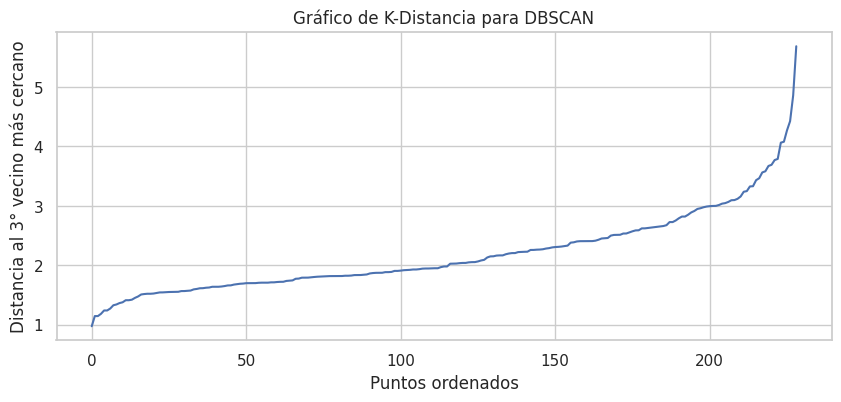

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Usar la técnica del gráfico de KNN para encontrar un buen valor de 'eps'
# Generalmente, se usa k = min_samples - 1; elegiremos min_samples = 5 como punto de partida
min_samples = 3
nearest_neighbors = NearestNeighbors(n_neighbors=min_samples).fit(scaled_features)
distances, indices = nearest_neighbors.kneighbors(scaled_features)

# Ordenar las distancias
distances = np.sort(distances[:, min_samples - 1], axis=0)

# Graficar el gráfico de K-distancia para ayudar a determinar el valor de 'eps'
plt.figure(figsize=(10, 4))
plt.plot(distances)
plt.title('Gráfico de K-Distancia para DBSCAN')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al ' + str(min_samples) + '° vecino más cercano')
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

# Elegir un valor de 'eps' basado en el gráfico de K-Distancia
eps_value = 3.5  # Un valor en el rango sugerido por el gráfico

# Aplicar DBSCAN
dbscan = DBSCAN(eps=eps_value, min_samples=3)
clusters = dbscan.fit_predict(scaled_features)

print(clusters)
# Añadir los resultados del clustering al dataframe
features_df['cluster'] = clusters

# Contar cuántos puntos hay en cada clúster
cluster_counts = features_df['cluster'].value_counts()

cluster_counts, features_df.head()

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0]


<ipython-input-111-3f7745242d54>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_df['cluster'] = clusters


( 0    223
 -1      6
 Name: cluster, dtype: int64,
    danceability  energy  key  loudness  mode  speechiness  acousticness  \
 0         0.851   0.843   11    -3.634     0       0.0447        0.2550   
 1         0.543   0.962    4    -5.337     0       0.1060        0.0274   
 2         0.595   0.749    7    -6.627     1       0.0702        0.0216   
 3         0.682   0.629    4   -10.538     1       0.1280        0.4970   
 4         0.543   0.557    9    -8.672     0       0.0908        0.3830   
 
    instrumentalness  liveness  valence    tempo  duration_ms  cluster  
 0          0.000667    0.1630    0.964   96.034       197120        0  
 1          0.027000    0.0900    0.639  193.660       275893        0  
 2          0.000000    0.2440    0.888  192.579       283333        0  
 3          0.000028    0.4260    0.696   78.749       155933        0  
 4          0.000010    0.0837    0.401   81.926       233800        0  )

Vemos que DBSCAN nos devuelve un solo cluster. Sin embargo, hay 6 observaciones que no pudo agrupar. Observamos de que canciones se trata, ya que son posibles outliers

In [ ]:
df_dbscan=features_df[['cluster']].copy()
df_dbscan['song_id']=df_metadata[['song_id']].copy()
df_dbscan['song_iname']=df_metadata[['song_name']].copy()
df_dbscan[df_dbscan['cluster']<0]

,cluster,song_id,song_iname
55,-1,49fzPkBb3aOUWYRKaTWVhm,Hit the Road Jack
125,-1,4ys11R56hYtBpYAvYrwh7p,Huellas
150,-1,2QsOO5YLSwejpB3GB56uZ1,The Clansman - Live At Rock in Rio '01
211,-1,4u4VElxO7JM4IR4jR4TL1s,Arrival to Earth
212,-1,08QaHlMPWuO5PUxjl61bXn,He's a Pirate
213,-1,5K2OuUEVN3eh581IpggOH1,"Por Una Cabeza (From ""Scent Of A Woman"")"


Armamos un dendograma habiendo realizado clustering jerárquico con el método ward:

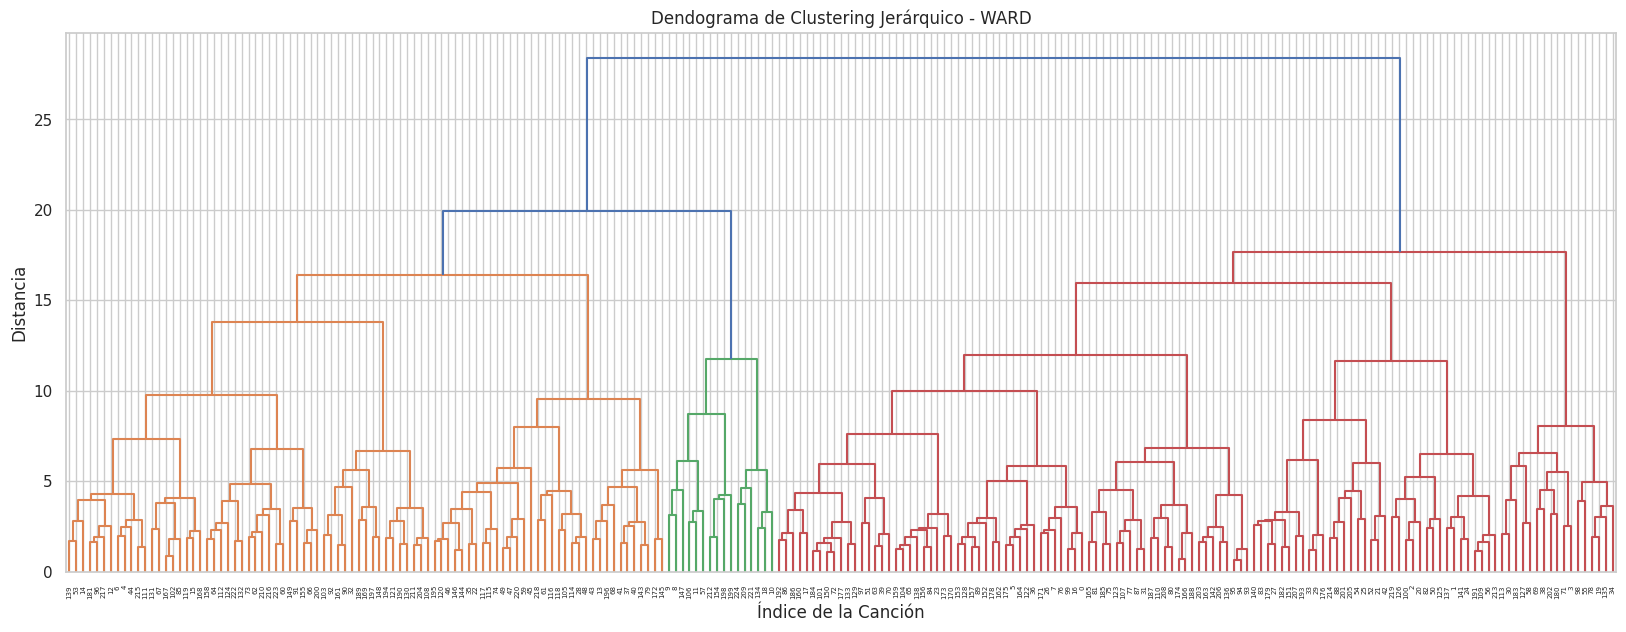

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Seleccionamos variables relevantes para el clustering
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms']
features_df = df_songs[features]

indices_a_eliminar = [125, 150, 212, 213]

# Crear un nuevo DataFrame sin las filas especificadas
df_sinout = features_df.drop(indices_a_eliminar)

# Antes de aplicar clustering jerárquico es necesario estandarizar.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_sinout)

# Aplicamos clustering jerárquico
linked = linkage(scaled_features, method='ward')

# Crear el dendograma
plt.figure(figsize=(20, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendograma de Clustering Jerárquico - WARD')
plt.xlabel('Índice de la Canción')
plt.ylabel('Distancia')
plt.show()

Obtenemos los clusters con k=2

In [ ]:
k = 2
clusters_ward = fcluster(linked, k, criterion='maxclust')

# Mostrar los clusters
print(clusters_ward)

counts = np.bincount(clusters_ward)
counts

[1 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 1 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 2 1 1 2 1
 2 1 1 2 2 1 2 2 2 2 2 2 2 1 1 1 2 1 1 1 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 1 2
 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 2 1 1 1 1 1 2 2 1 2 2 1 2 1 1
 2 2 1 2 2 2 2 2 2 2 2 1 1 2 1 1 1 1 1 2 2 2 1 2 1 1 1 1 2 1 1 1 2 2 2 2 2
 2 2 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 2 2 1 1 1 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1 2 2 2 2 1 1 2 2 2 2 1 2 2
 2 2 2]


array([  0, 122, 103])

Hacemos k-means para validar

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Definir el número de clusters (k=2 en tu caso)
k = 2

# Aplicar el algoritmo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters_km = kmeans.fit_predict(scaled_features)

# Mostrar el DataFrame con los clusters asignados
#print(df_features)

clusters_km
counts = np.bincount(clusters_km)
counts

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([ 87, 138])

Medimos la similaridad de los resultados de k-means y de ward con el coeficiente de Jaccard

In [ ]:
from sklearn.metrics import jaccard_score

# Supongamos que tienes clusters_km y clusters_ward
# Asegúrate de que ambos tienen la misma longitud y corresponden a las mismas observaciones

# Calcular el coeficiente de Jaccard
jaccard_coefficient = jaccard_score(clusters_km, clusters_ward, average='micro')

# Mostrar el coeficiente de Jaccard
print(f"Coeficiente de Jaccard: {round(jaccard_coefficient,3)}")

Coeficiente de Jaccard: 0.339


Validación artesanal:
Hacer un análisis de cada uno de los clusters obtenidos con ward en base a las variables de validacion

In [ ]:
# dataframe con las variables de validación y etiqueta de clusters ward (sin outliers)
var_cualitativas=['song_name', 'artist', 'album', 'key', 'mode', 'time_signature']

df_val=df_songs[var_cualitativas]
indices_a_eliminar = [125, 150, 212, 213]
# Crear un nuevo DataFrame sin las filas especificadas
df_validacion=df_val.drop(indices_a_eliminar)

df_validacion['clusters_ward']=clusters_ward

df_validacion_1=df_validacion[df_validacion['clusters_ward']==1]
df_validacion_2=df_validacion[df_validacion['clusters_ward']==2]

df_validacion_2


,song_name,artist,album,key,mode,time_signature,clusters_ward
4,Cacique Yatel,Rubén Patagonia,La Historia - 2da Parte,9,0,4,2
6,Chacarera del Violín,Néstor Garnica,La Fiesta Del Violinero,9,0,4,2
8,El Choclo,Juan D'Arienzo,Serie De Oro: Juan D'Arienzo,10,0,4,2
9,La Yumba - Instrumental,Osvaldo Pugliese,Ausencia,9,0,4,2
10,La cumparsita,Juan D'Arienzo,Orquesta Juan D' Arienzo - La cumparsita,7,0,4,2
...,...,...,...,...,...,...,...
224,Gajito de Cedrón,Rodrigo Montero,Gajito de Cedrón,0,1,4,2
225,Vivaldi Variation (Arr. for Piano from Concert...,Antonio Vivaldi,Vivaldi Variation (Arr. for Piano from Concert...,7,0,1,2
226,Black Velvet,Alannah Myles,Alannah Myles,8,1,4,2
227,Husavik (My Hometown),Will Ferrell,Eurovision Song Contest: The Story of Fire Sag...,6,1,4,2


Podemos analizar tendencias de clave, modo y time_signature para ambos clusters

<ipython-input-143-32756774ba14>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validacion_1['Clusters'] = 'Cluster 1'
<ipython-input-143-32756774ba14>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_validacion_2['Clusters'] = 'Cluster 2'


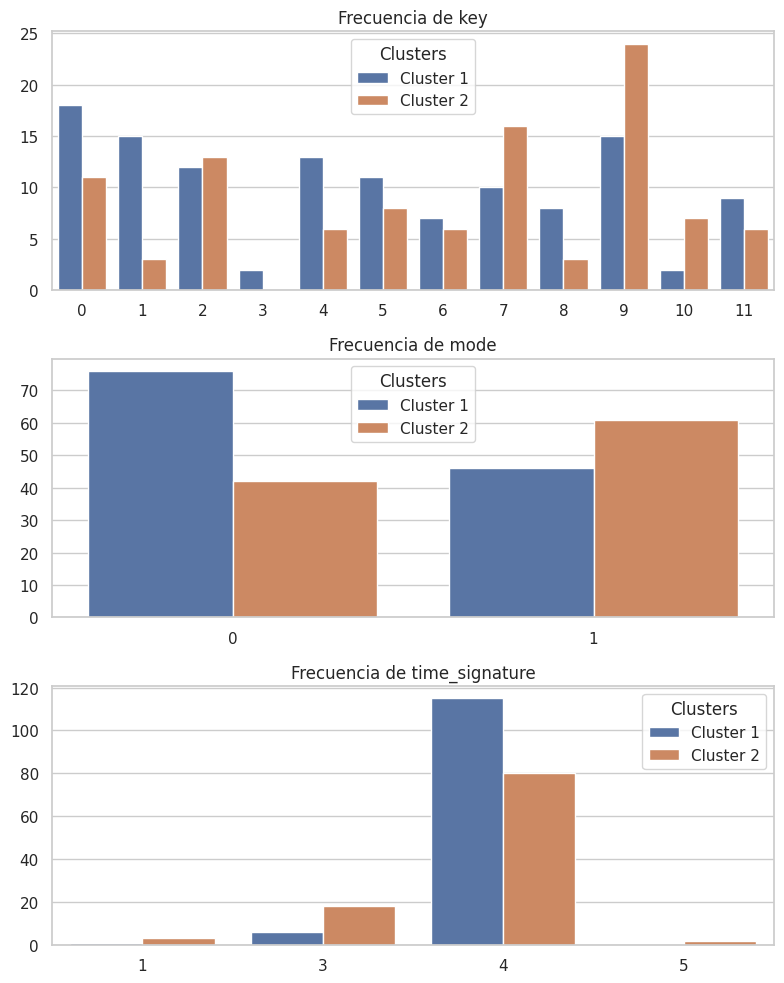

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes los dataframes df_validacion_1 y df_validacion_2

# Variables de interés
variables = ['key', 'mode', 'time_signature']

# Combina los dataframes y agrega una columna 'Clusters' para distinguir entre ellos
df_validacion_1['Clusters'] = 'Cluster 1'
df_validacion_2['Clusters'] = 'Cluster 2'

# Combina ambos dataframes en uno solo
combined_df = pd.concat([df_validacion_1, df_validacion_2])

# Configurar el tamaño de la figura y el diseño de los subgráficos
fig, axes = plt.subplots(nrows=len(variables), ncols=1, figsize=(8, 10))

# Iterar sobre las variables y crear los barplots comparativos
for i, variable in enumerate(variables):
    sns.countplot(x=variable, hue='Clusters', data=combined_df, ax=axes[i]).set(title=f'Frecuencia de {variable}', xlabel=None, ylabel=None)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [ ]:
np.bincount(df_validacion['time_signature']==4)

array([ 30, 195])

El 86% de las canciones tienen valor de 'time_signature' = 4. No vale la pena analizar esta variable

In [ ]:
df_validacion_1

,song_name,artist,album,key,mode,time_signature,clusters_ward,dataframe,Clusters
0,Matador,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,11,0,4,1,df_validacion_1,Cluster 1
1,Matador - Remasterizado 2008,Los Fabulosos Cadillacs,Vasos Vacíos,4,0,4,1,df_validacion_1,Cluster 1
2,El Campanero,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,7,1,4,1,df_validacion_1,Cluster 1
3,Chacarera Del Sufrido,Raly Barrionuevo,El Sueño De Los Viajeros,4,1,1,1,df_validacion_1,Cluster 1
5,Chacarera Del Rancho,Los Nocheros,Signos,9,0,3,1,df_validacion_1,Cluster 1
...,...,...,...,...,...,...,...,...,...
209,Dreams (Will Come Alive),2 Brothers On The 4th Floor,Dreams,7,0,4,1,df_validacion_1,Cluster 1
210,Bella Señora,Emmanuel,Lo Esencial,1,1,4,1,df_validacion_1,Cluster 1
217,Ramón,Kapanga,A 15 Cm De La Realidad,11,0,4,1,df_validacion_1,Cluster 1
218,Walk Of Life - Live Version,Dire Straits,On The Night,4,1,4,1,df_validacion_1,Cluster 1


In [ ]:
df_validacion_2

,song_name,artist,album,key,mode,time_signature,clusters_ward,dataframe,Clusters
4,Cacique Yatel,Rubén Patagonia,La Historia - 2da Parte,9,0,4,2,df_validacion_2,Cluster 2
6,Chacarera del Violín,Néstor Garnica,La Fiesta Del Violinero,9,0,4,2,df_validacion_2,Cluster 2
8,El Choclo,Juan D'Arienzo,Serie De Oro: Juan D'Arienzo,10,0,4,2,df_validacion_2,Cluster 2
9,La Yumba - Instrumental,Osvaldo Pugliese,Ausencia,9,0,4,2,df_validacion_2,Cluster 2
10,La cumparsita,Juan D'Arienzo,Orquesta Juan D' Arienzo - La cumparsita,7,0,4,2,df_validacion_2,Cluster 2
...,...,...,...,...,...,...,...,...,...
224,Gajito de Cedrón,Rodrigo Montero,Gajito de Cedrón,0,1,4,2,df_validacion_2,Cluster 2
225,Vivaldi Variation (Arr. for Piano from Concert...,Antonio Vivaldi,Vivaldi Variation (Arr. for Piano from Concert...,7,0,1,2,df_validacion_2,Cluster 2
226,Black Velvet,Alannah Myles,Alannah Myles,8,1,4,2,df_validacion_2,Cluster 2
227,Husavik (My Hometown),Will Ferrell,Eurovision Song Contest: The Story of Fire Sag...,6,1,4,2,df_validacion_2,Cluster 2


Ver top artistas y top albumes por cluster

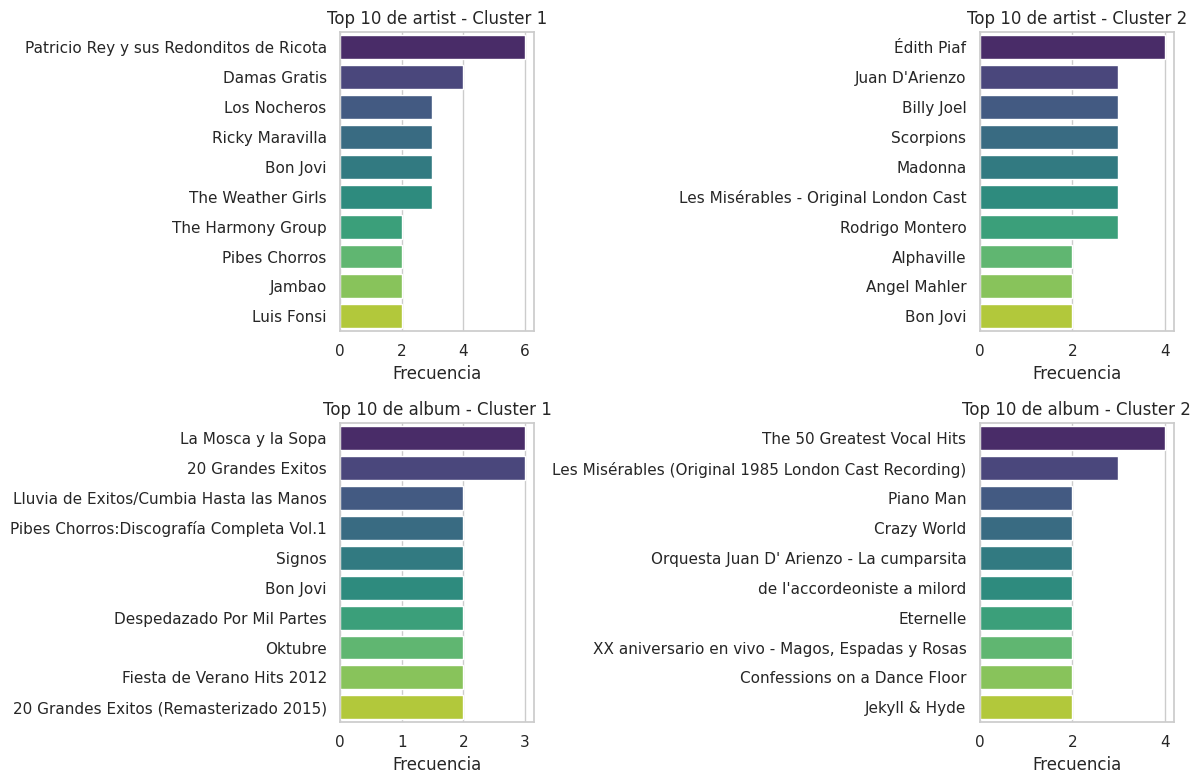

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes los dataframes df_validacion_1 y df_validacion_2

# Variables de interés
variables_categoricas = ['artist', 'album']

# Configurar el tamaño de la figura y el diseño de los subgráficos
fig, axes = plt.subplots(nrows=len(variables_categoricas), ncols=2, figsize=(12, 8))

# Iterar sobre las variables y crear los histogramas para cada dataframe
for j, variable in enumerate(variables_categoricas):
    for i, df in enumerate([df_validacion_1, df_validacion_2]):
        top_10 = df[variable].value_counts().nlargest(10)
        sns.barplot(x=top_10.values, y=top_10.index, ax=axes[j, i], palette="viridis", orient='h').set(title=f'Top 10 de {variable} - Cluster {i+1}', xlabel='Frecuencia', ylabel=None)

# Ajustar el diseño
plt.tight_layout()
plt.show()